## Infinite Overlapping Mixture Model with Binary clusters

In [207]:
%load_ext autoreload
%autoreload 2
import utils, iomm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Synthetic Data

In [262]:
#Generate synthetic data
K=5
N=10
D=8
N_iter=10
alpha_prior = 2
burning_period=3

Z = utils.random_z(N,K)
X = utils.random_x(N,D)
theta= utils.random_theta(N,K,D,alpha_prior)

In [263]:
Z

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [264]:
X

array([[ 1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [265]:
theta

array([[  1.65313299e-01,   7.70397496e-01,   4.99756147e-01,
          9.47829909e-02,   5.55957054e-01,   8.41617830e-01,
          7.55019069e-01,   7.36383717e-01],
       [  3.10441567e-01,   1.22112551e-02,   8.00752527e-01,
          4.31160186e-01,   3.52780059e-01,   2.13816815e-02,
          1.22635040e-06,   6.27746490e-01],
       [  3.28131945e-02,   6.69380181e-02,   5.18619423e-02,
          7.36236545e-04,   7.40215220e-01,   1.30517882e-02,
          8.17359456e-01,   4.58671937e-02],
       [  5.69501422e-01,   3.03490942e-01,   7.28830332e-02,
          5.47775704e-01,   8.96693159e-01,   3.68469118e-03,
          2.95346088e-01,   2.97553453e-05],
       [  1.01731560e-01,   6.30231492e-01,   3.60091495e-01,
          2.40528161e-01,   6.52998771e-01,   9.17044355e-01,
          7.55989136e-01,   5.63288171e-01]])

#### IOMM algorithm

In [266]:
IOMM = iomm.IOMM(N = N, 
                 K = K, 
                 D = D, 
                 N_iter = N_iter, 
                 Z = Z, 
                 X = X, 
                 theta = theta, 
                 alpha_prior = alpha_prior, 
                 omega = 10,
                 copy_rows = 4,
                 burning_period=burning_period)

norm_lh[ 0 ] =  11.1447229566
norm_lh[ 1 ] =  8.44876888432
norm_lh[ 2 ] =  7.03406567841
norm_lh[ 3 ] =  18.9182711844
norm_lh[ 4 ] =  13.5157961333
norm_lh = 11.1447229566


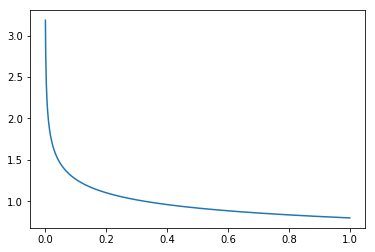

In [267]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
plt.plot(np.arange(0,1,0.001),beta.pdf(np.arange(0,1,0.001),4/K,1))
plt.show()

In [268]:
Z_hat = IOMM.learning(apply_log=False)

iteration n° 0
_______3.resample theta|Z,X using MHA_______
current theta: [ 0.1653133   0.31044157  0.03281319  0.56950142  0.10173156]
theta_k_d proposal: [ 0.11978536  0.62215469  0.08941309  0.5092216   0.0103356 ]
joint prior current theta: [ 1.17781021  0.80699728  3.10764129  0.56074202  1.57611016]
joint prior prop theta: [ 1.42895234  0.53176649  1.70301837  0.59967494  6.21525052]
likelihood current theta: [ 1.          0.45020342  0.001151    1.          1.        ]
likelihood current prop: [ 1.          1.64658572  0.00964183  1.          1.        ]
acceptance probability = 3.75314910259
acceptance probability = 2.28689523026
acceptance probability = 0.582587521506
acceptance probability = 2.41077507621
acceptance probability = 48.5308303242
current theta: [ 0.7703975   0.01221126  0.06693802  0.30349094  0.63023149]
theta_k_d proposal: [ 0.78105008  0.00665352  0.08771008  0.37692496  0.63330154]
joint prior current theta: [ 0.46776861  5.62346256  2.02607856  0.81803625 

likelihood current theta: [ 1.          2.92146695  0.20272694  5.47058825  1.        ]
likelihood current prop: [  1.           3.18194893   0.2154804   71.09216309   1.        ]
acceptance probability = 11.6562027325
acceptance probability = 6.57802341135
acceptance probability = 5.78352806327
acceptance probability = 75.407192096
acceptance probability = 5.87348720147
current theta: [ 0.17312483  0.3028503   0.03516336  0.47245391  0.25125312]
theta_k_d proposal: [ 0.24096818  0.32043061  0.12116728  0.7103432   0.31442092]
joint prior current theta: [ 1.14563     0.81907408  2.98130076  0.62725528  0.91620595]
joint prior prop theta: [ 0.93947271  0.79180746  1.41915153  0.49111031  0.8008536 ]
likelihood current theta: [ 1.          0.18871392  0.00132823  1.          1.        ]
likelihood current prop: [ 1.          0.22233119  0.01900896  1.          1.        ]
acceptance probability = 0.591459858223
acceptance probability = 0.81529761378
acceptance probability = 0.16549487466

proba Z=1: 0.42062526018
k= 3
proba Z=1: 0.143213548099
proba Z=1: 0.0
_________2.propose adding new clusters________
accepted for k = 2
i = 5
___________1.compute probability of observation i taking category k_________
proba Z=1: 0.0
proba Z=1: 0.431421513981
k= 2
proba Z=1: 1.79103446918e-05
proba Z=1: 1.62399186934
proba Z=1: 0.0
_________2.propose adding new clusters________
i = 6
___________1.compute probability of observation i taking category k_________
proba Z=1: 0.0
proba Z=1: 0.0137991859283
k= 2
proba Z=1: 1.34278913617e-06
k= 3
proba Z=1: 0.065182804852
proba Z=1: 0.0
_________2.propose adding new clusters________
i = 7
___________1.compute probability of observation i taking category k_________
proba Z=1: 0.0
proba Z=1: 0.359576827179
k= 2
proba Z=1: 0.000313095415096
k= 3
proba Z=1: 1.57258680181e-05
proba Z=1: 0.0
_________2.propose adding new clusters________
i = 8
___________1.compute probability of observation i taking category k_________
proba Z=1: 0.0
proba Z=1: 0.3

In [232]:
Z_hat

array([[ 1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  1.,  0.]])

In [233]:
Z

array([[ 1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.]])